In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statistics
from scipy import stats

# Disable warnings!
import warnings
warnings.filterwarnings("ignore")

In [190]:
df=pd.read_csv('/Users/ee/Documents/GITHUB/Project-12 Alaska Airlines/Cheeseplate Demand Data.csv') # contains betwen 2016-March to 2019-February
df.shape

(5000, 6)

In [191]:
df.dtypes

Dptr Hour                  int64
Length of Flight (Hrs)     int64
Day of Week               object
Passengers Boarded         int64
Stock Out Occurred         int64
Cheese Platters Sold       int64
dtype: object

In [192]:
df.isnull().sum()

Dptr Hour                 0
Length of Flight (Hrs)    0
Day of Week               0
Passengers Boarded        0
Stock Out Occurred        0
Cheese Platters Sold      0
dtype: int64

In [193]:
d={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

df['Day of Week']=df['Day of Week'].map(d)
df.shape

(5000, 6)

In [194]:
df.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold
0,8,1,2,144,0,18
1,5,3,1,152,0,15
2,4,2,4,150,0,16
3,6,2,4,131,0,13
4,5,6,4,164,0,18


 # 1.EXPLORE DATA

## Relation Between # of Sold Platters

In [114]:
df.columns

Index(['Dptr Hour', 'Length of Flight (Hrs)', 'Day of Week',
       'Passengers Boarded', 'Stock Out Occurred', 'Cheese Platters Sold'],
      dtype='object')

In [115]:
t=df.groupby(by=df.columns[2]).mean()
t[['Cheese Platters Sold']]

,Cheese Platters Sold
Day of Week,
1,16.158114
2,16.103208
3,16.338527
4,16.033149
5,16.089510
6,15.027360
7,15.173469


In [116]:
def relation_s(a):
    t=df.groupby(by=df.columns[a]).mean()
    t=t[['Cheese Platters Sold']]

    plt.figure(figsize=(15,7))
    
    if df.columns[a]!='Dptr Hour':
        plt.scatter(x=t.index, y=t['Cheese Platters Sold'])
        plt.title('Average Cheese Platters Sold by '+df.columns[a])
        plt.xlabel(df.columns[a])
        plt.ylabel('Cheese Platters Sold')
        plt.show()
    else: # this section works only for "Dptr Hour"
        x=t.index
        y=t['Cheese Platters Sold']
        plt.scatter(x,y)
        plt.title('Average Cheese Platters Sold by '+df.columns[0])
        plt.xlabel(df.columns[0])
        plt.ylabel('Cheese Platters Sold')

        x1=t.index[:8]
        y1=t['Cheese Platters Sold'][:8]
        z = np.polyfit(x1, y1, 1)
        p = np.poly1d(z)
        plt.plot(x1,p(x1),"r--")

        x2=t.index[8:20]
        y2=t['Cheese Platters Sold'][8:20]
        z = np.polyfit(x2, y2, 1)
        p = np.poly1d(z)
        plt.plot(x2,p(x2),"r--")

        x3=t.index[20:]
        y3=t['Cheese Platters Sold'][20:]
        z = np.polyfit(x3, y3, 1)
        p = np.poly1d(z)
        plt.plot(x3,p(x3),"r--")

        plt.show()

In [117]:
def relation_b(a):
    t=df.groupby(by=df.columns[a]).mean()
    t=t[['Cheese Platters Sold']]
    title='Average Cheese Platters Sold by '+df.columns[a]
    t.plot(kind='bar', figsize=(15,7),title=title).grid(axis='y')
    plt.ylabel('Cheese Platters Sold')
    plt.show()

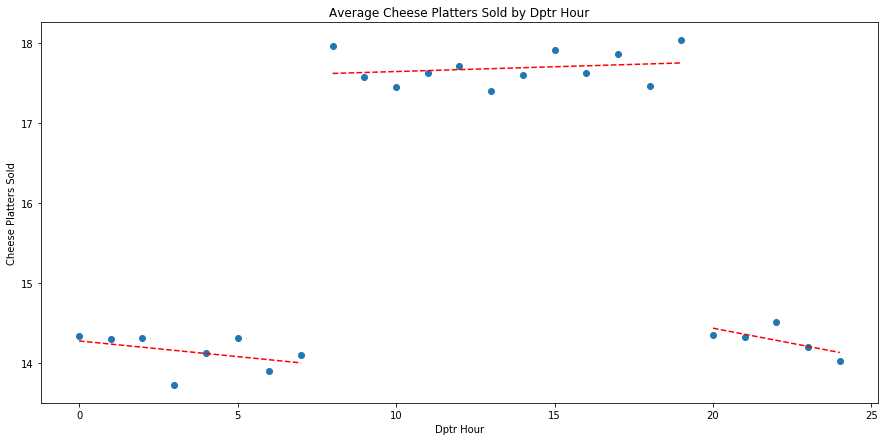

None


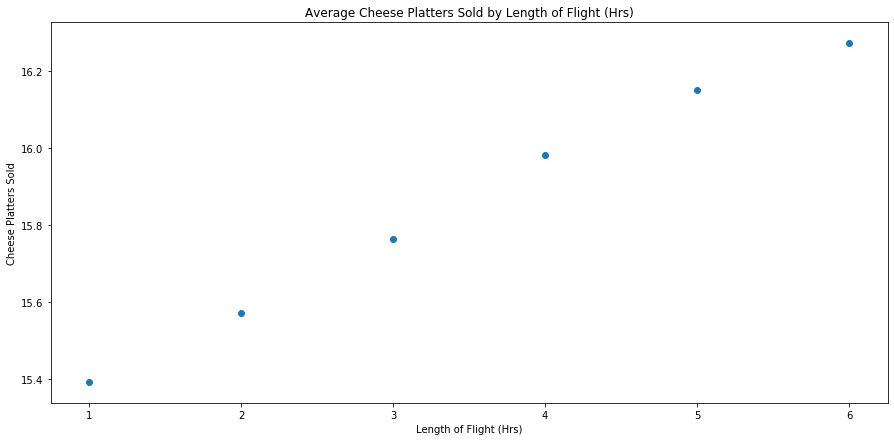

None


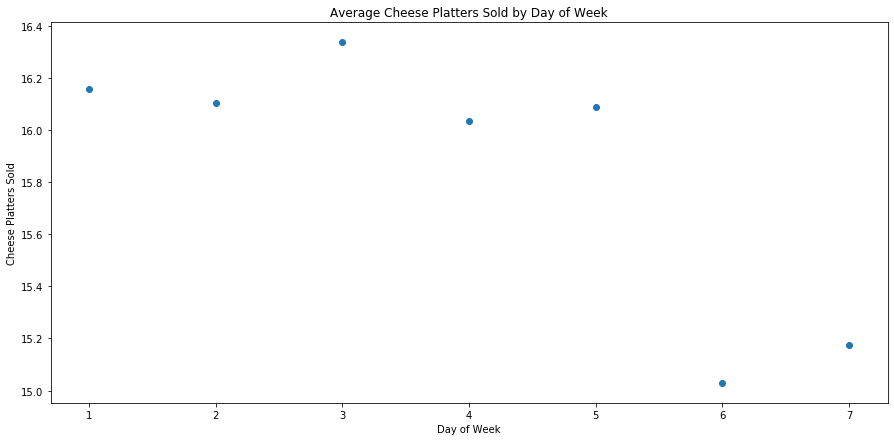

None


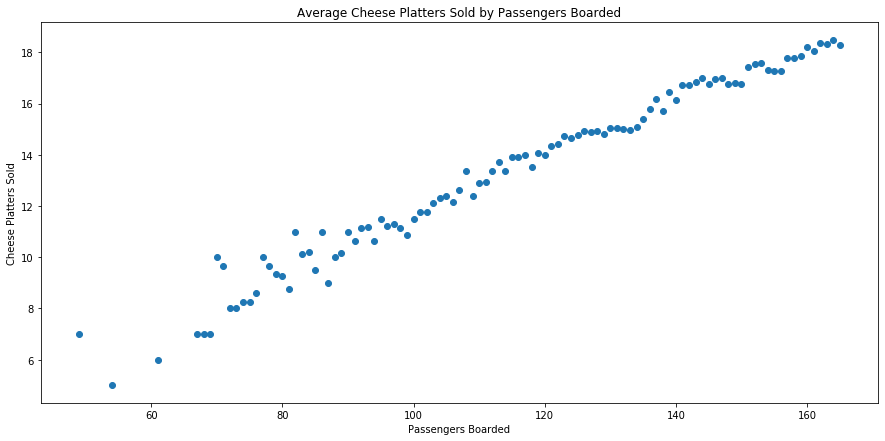

None


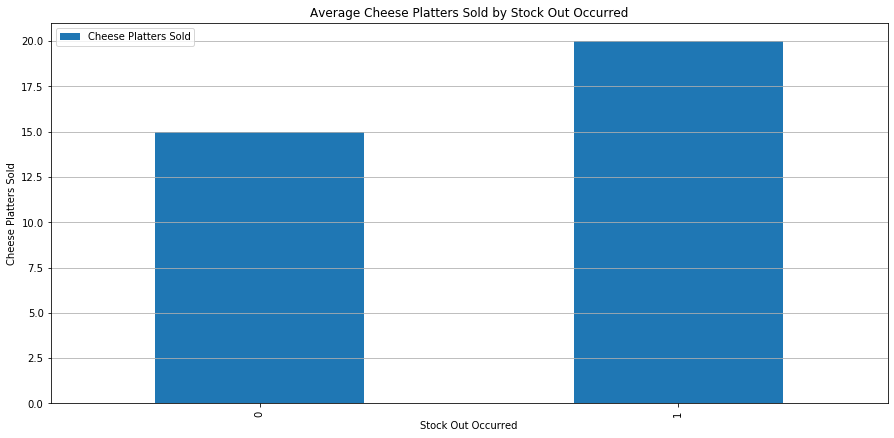

None


In [118]:
for i in range(5):
    if i==4:
        print(relation_b(i))
    else:
        print(relation_s(i))

## by Dept Hour & Week Days

In [195]:
df2=df

In [196]:
d={1:'Weekday',2:'Weekday',3:'Weekday',4:'Weekday',5:'Weekday',6:'Weekend',7:'Weekend'}

df2['Week Part']=df2['Day of Week'].map(d)
df2.shape

(5000, 7)

In [197]:
df2.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold,Week Part
0,8,1,2,144,0,18,Weekday
1,5,3,1,152,0,15,Weekday
2,4,2,4,150,0,16,Weekday
3,6,2,4,131,0,13,Weekday
4,5,6,4,164,0,18,Weekday


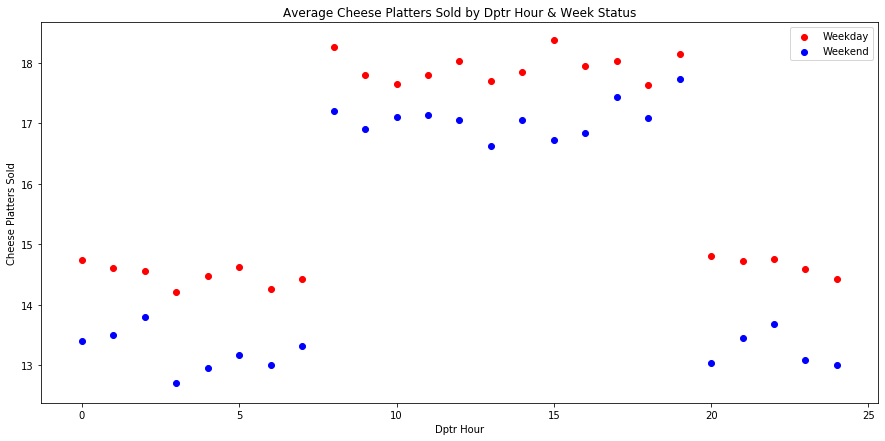

In [122]:
p=df2.groupby(['Week Part','Dptr Hour']).mean()[['Cheese Platters Sold']].unstack().T
p.index=p.index.droplevel(level=0)

x=p.index
y1=p['Weekday']
y2=p['Weekend']


plt.figure(figsize=(15,7))
plt.scatter(x,y1,color='red', label='Weekday')
plt.scatter(x,y2,color='blue', label='Weekend')
plt.title('Average Cheese Platters Sold by Dptr Hour & Week Status')
plt.xlabel('Dptr Hour')
plt.ylabel('Cheese Platters Sold')
plt.legend()
plt.show()

### describe Non Stock Out - Cheese Platters Sold

In [123]:
df2[df2['Stock Out Occurred']==0].groupby(['Cheese Platters Sold']).count()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Week Part
Cheese Platters Sold,,,,,,
5,1,1,1,1,1,1
6,2,2,2,2,2,2
7,9,9,9,9,9,9
8,16,16,16,16,16,16
9,63,63,63,63,63,63
10,116,116,116,116,116,116
11,205,205,205,205,205,205
12,305,305,305,305,305,305
13,450,450,450,450,450,450


In [124]:
nso=df2[df2['Stock Out Occurred']==0][['Cheese Platters Sold']]
nso.describe(percentiles=[.05, .5, .95])

,Cheese Platters Sold
count,4137.000000
mean,14.981146
std,2.556732
min,5.000000
5%,10.800000
50%,15.000000
95%,19.000000
max,19.000000


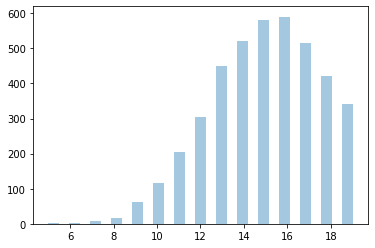

In [125]:
sns.distplot(nso, kde=False)

## Distribution

In [126]:
def graphs(table,main_title):

    plt.subplots(3,2, figsize=(20,15))
    plt.suptitle(main_title, size=20) # add above a Main Title

    plt.subplot(3,2,1, title='distribution of Dptr Hour')
    sns.distplot(table['Dptr Hour'], bins=25, kde=False, color='c') # alternative colors are k, g, b, and m

    plt.subplot(3,2,2, title='distribution of Length of Flight (Hrs)')
    sns.distplot(table['Length of Flight (Hrs)'], bins=25, kde=False)

    plt.subplot(3,2,3, title='distribution of Day of Week')
    sns.distplot(table['Day of Week'], kde=False)

    plt.subplot(3,2,4, title='distribution of Passengers Boarded')
    sns.distplot(table['Passengers Boarded'], bins=50, kde=False)
    
    plt.subplot(3,2,5, title='distribution of Stock Out Occurred')
    sns.distplot(table['Stock Out Occurred'],kde=False)
    
    plt.subplot(3,2,6, title='distribution of Cheese Platters Sold')
    sns.distplot(table['Cheese Platters Sold'], bins=25, kde=False)

In [127]:
def dist_graph(a,b,c):
    if b=='y':
        t=df.groupby(by=df.columns[a]).count()[:c]
    else:
        t=df.groupby(by=df.columns[a]).count()
    
    t=t[[t.columns[0]]]
    title='Number of Flights by '+df.columns[a]
    if df.columns[a]=='Passengers Boarded':
        t.plot(kind='bar', figsize=(15,6),title=title).grid(axis='y')
    else:
        t.plot(kind='bar', figsize=(15,6),title=title).grid(axis='y')
    plt.ylabel('Number of Flights')
#     plt.show()

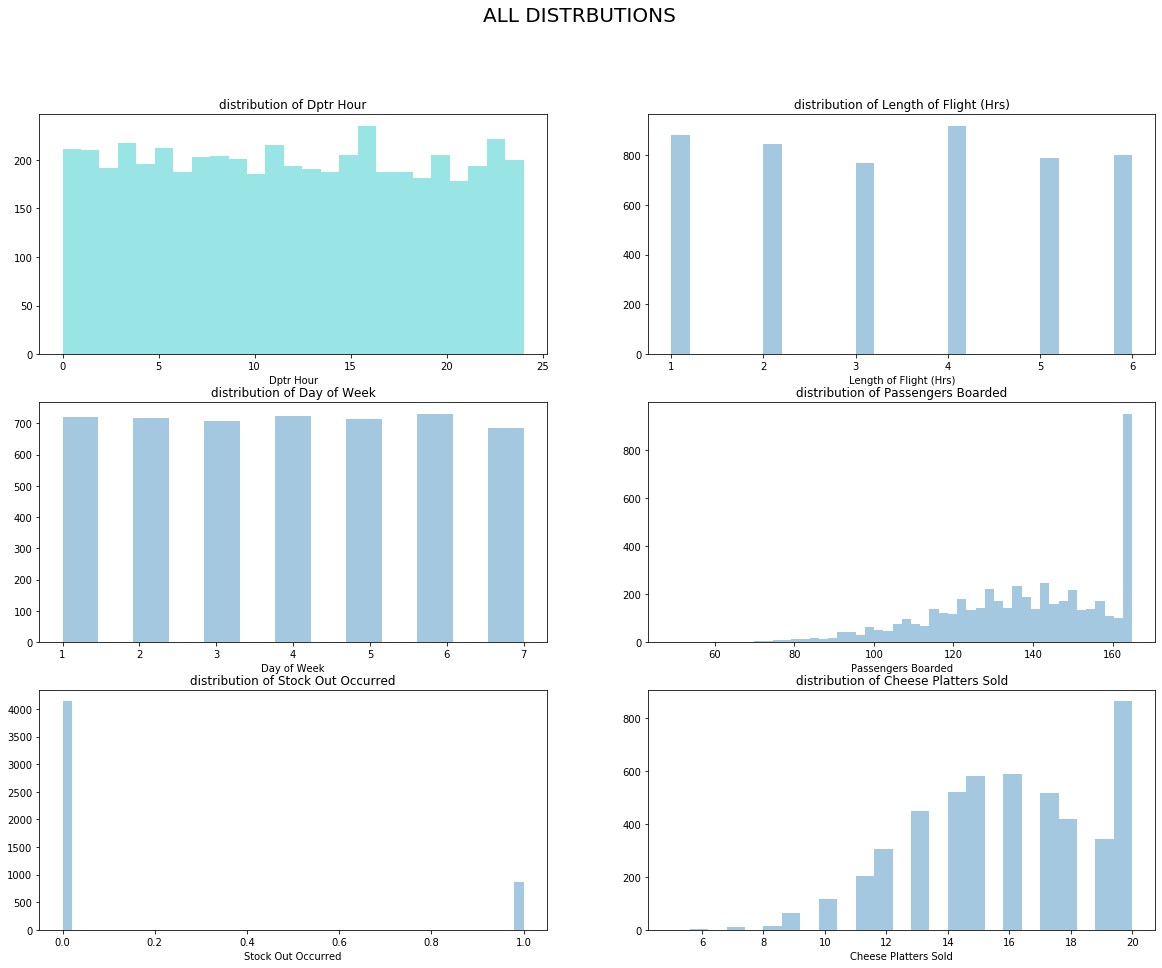

In [128]:
graphs(df,'ALL DISTRBUTIONS')

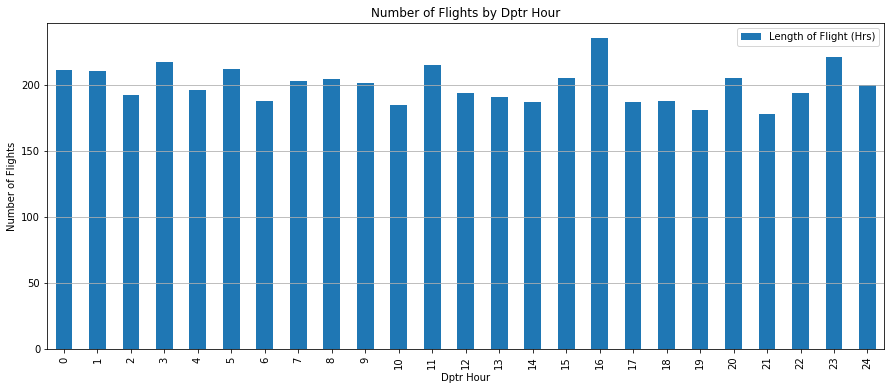

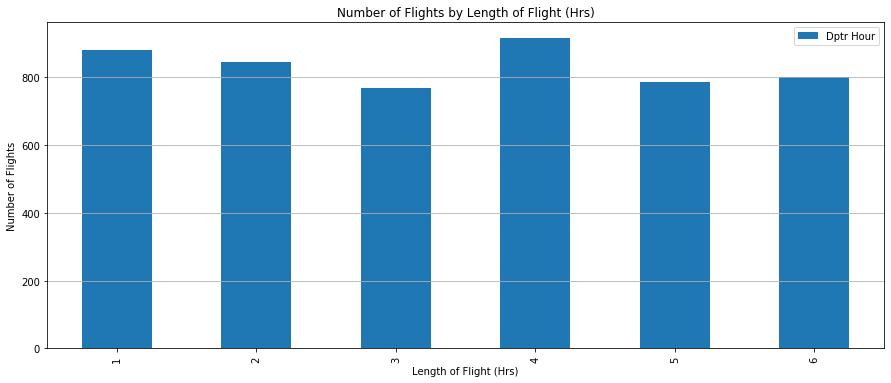

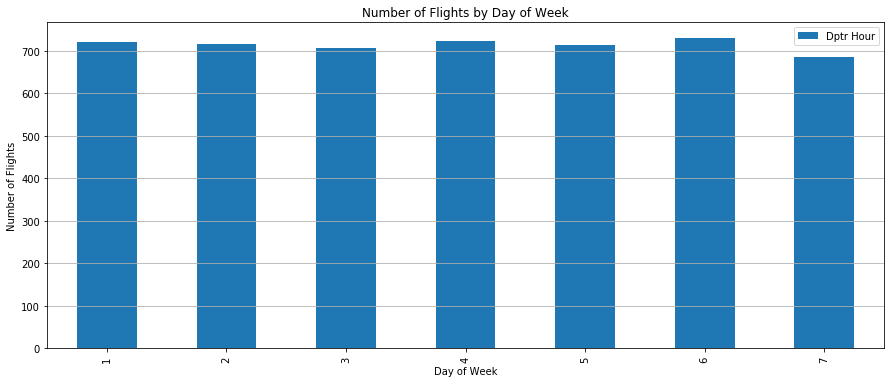

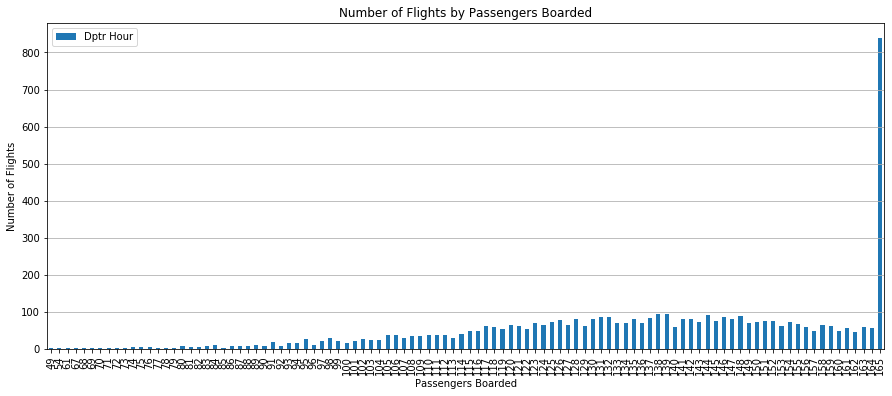

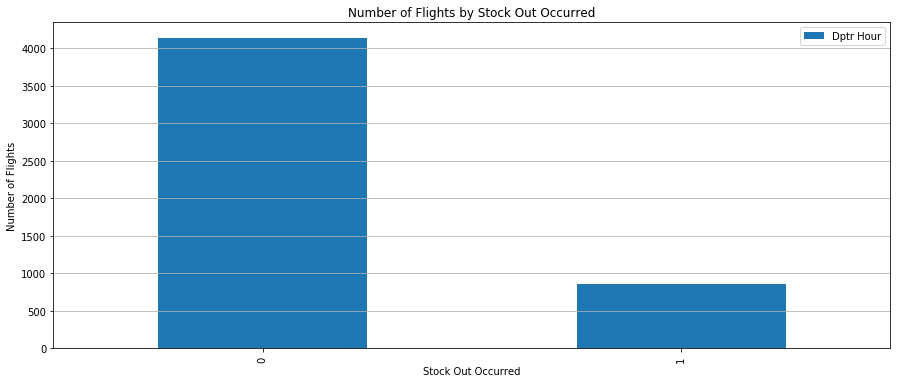

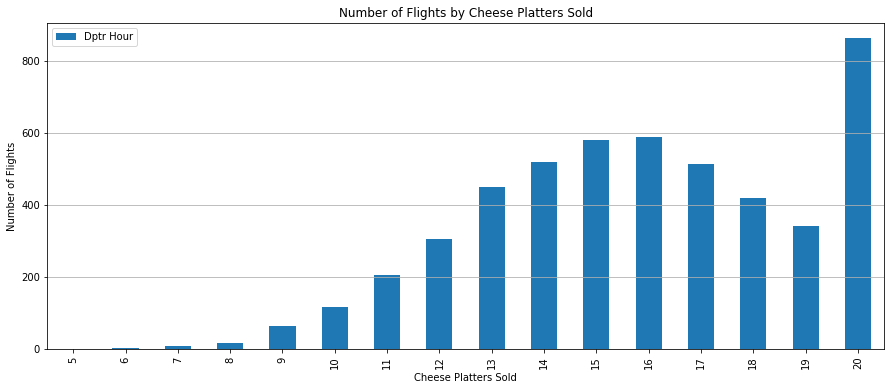

In [129]:
for i in range(6):
    dist_graph(i,'n',-1)

### describe Non Stock Out - Passengers Boarded

In [130]:
nso_passenger=df2[df2['Stock Out Occurred']==0][['Passengers Boarded']]
nso_passenger.describe(percentiles=[.05, .5, .95])

,Passengers Boarded
count,4137.000000
mean,133.998308
std,20.979076
min,49.000000
5%,97.000000
50%,135.000000
95%,165.000000
max,165.000000


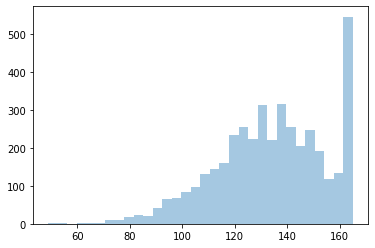

In [131]:
sns.distplot(nso_passenger, kde=False)

# 3.ESTIMATING DEMAND

## Model 1- Predict "Stock Out Sales"

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import statsmodels.api as sm

In [133]:
def process_train(model,X):
    ss=StandardScaler()
    X_sc=ss.fit_transform(X)
#     print(X_sc)
    model.fit(X_sc,y_train)
    crv=cross_val_score(model,X_sc,y_train).mean().round(4)
    return(crv)

In [134]:
def process_test(model,X_test):
    ss=StandardScaler()
    X_test_sc=ss.fit_transform(X_test)
    ms=model.score(X_test_sc,y_test).round(4)
    return ms

In [135]:
def coefficients(model,X_train):
    x=pd.DataFrame(model.coef_.round(4),columns=X_train.columns).T
    x=x.rename(columns={0:'coefficient'})
    return x

In [136]:
def summary(model):
    model=sm.Logit(y_train,X_train)
    result=model.fit()
    print(result.summary())

In [201]:
df4=df2
df4.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold,Week Part
0,8,1,2,144,0,18,Weekday
1,5,3,1,152,0,15,Weekday
2,4,2,4,150,0,16,Weekday
3,6,2,4,131,0,13,Weekday
4,5,6,4,164,0,18,Weekday


In [202]:
time_class_dict={ 'early':[0, 7], 'midday':[8, 19],'night':[20,24]}

def time_class_maker(value, time_class_dict=time_class_dict):
        for k, v in time_class_dict.items():
            if (value>=v[0] and value<=v[1]):
                return(k)
            elif value=='NaN':
                return('unknown')# if time is null so it will return to string as 'unknown'

In [203]:
df4['Hour Class']=df4['Dptr Hour'].map(lambda x: time_class_maker(x))

In [204]:
# convert numeric features to string format
df4['Dptr Hour']=df4['Dptr Hour'].astype(str)
df4['Day of Week']=df4['Day of Week'].astype(str)

In [205]:
df4.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold,Week Part,Hour Class
0,8,1,2,144,0,18,Weekday,midday
1,5,3,1,152,0,15,Weekday,early
2,4,2,4,150,0,16,Weekday,early
3,6,2,4,131,0,13,Weekday,early
4,5,6,4,164,0,18,Weekday,early


In [206]:
df4.dtypes

Dptr Hour                 object
Length of Flight (Hrs)     int64
Day of Week               object
Passengers Boarded         int64
Stock Out Occurred         int64
Cheese Platters Sold       int64
Week Part                 object
Hour Class                object
dtype: object

In [207]:
df4=df4[['Week Part','Hour Class','Length of Flight (Hrs)',
       'Passengers Boarded', 'Stock Out Occurred',]] 
df4=pd.get_dummies(df4)
df4.head()

,Length of Flight (Hrs),Passengers Boarded,Stock Out Occurred,Week Part_Weekday,Week Part_Weekend,Hour Class_early,Hour Class_midday,Hour Class_night
0,1,144,0,1,0,0,1,0
1,3,152,0,1,0,1,0,0
2,2,150,0,1,0,1,0,0
3,2,131,0,1,0,1,0,0
4,6,164,0,1,0,1,0,0


In [208]:
features=['Length of Flight (Hrs)','Passengers Boarded','Week Part_Weekday','Hour Class_night','Hour Class_midday']
X=df4[features]
y=df4['Stock Out Occurred']

In [209]:
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42, stratify=y)

model=sm.Logit(y_train,X_train)
result=model.fit()
print(result.summary())

         Current function value: 0.402311
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:     Stock Out Occurred   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3745
Method:                           MLE   Df Model:                            4
Date:                Fri, 20 Mar 2020   Pseudo R-squ.:                  0.1252
Time:                        19:56:49   Log-Likelihood:                -1508.7
converged:                      False   LL-Null:                       -1724.6
Covariance Type:            nonrobust   LLR p-value:                 3.784e-92
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Length of Flight (Hrs)    -0.1657      0.025     -6.557      0.000      -0.215      -0.116
Passengers Boarded        -0.

In [210]:
features=['Length of Flight (Hrs)','Passengers Boarded','Week Part_Weekday','Hour Class_midday']#,'Hour Class_night'
X=df4[features]
y=df4['Stock Out Occurred']

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42, stratify=y)

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.417824
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Stock Out Occurred   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3746
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Mar 2020   Pseudo R-squ.:                 0.09145
Time:                        19:56:51   Log-Likelihood:                -1566.8
converged:                       True   LL-Null:                       -1724.6
Covariance Type:            nonrobust   LLR p-value:                 4.563e-68
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Length of Flight (Hrs)    -0.1790      0.025     -7.121      0.000      -0.228      

In [211]:
logit_model=sm.Logit(y_test,X_test)
result2=logit_model.fit()
# print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.425554
         Iterations 7


In [212]:
print('Length of Flight (Hrs) ',np.exp(-0.1753).round(4)) 
print('Passengers Boarded ',np.exp(-0.0139).round(4))  
print('Week Part_Weekday ',np.exp(-0.2773).round(4)) 
print('Hour Class_midday ',np.exp(2.0728).round(4)) 
# print(np.exp(0)) # For Weekend Part_Weekda or Hour Class_early

Length of Flight (Hrs)  0.8392
Passengers Boarded  0.9862
Week Part_Weekday  0.7578
Hour Class_midday  7.947


In [213]:
r1=result.pred_table() # train confusion matrix
r1

array([[2905.,  198.],
       [ 647.,    0.]])

In [214]:
r2=result2.pred_table() # test confusion matrix
r2

array([[982.,  52.],
       [216.,   0.]])

In [215]:
print('train score: ',accuracy_score(y_train, result.predict().round()).round(4))
print('test score: ',accuracy_score(y_test, result2.predict().round()).round(4))

train score:  0.7747
test score:  0.7856


##### linear model library

In [216]:
logreg_class=LogisticRegression(fit_intercept=True)

print (f'train score: {process_train(logreg_class,X_train).round(4)}')
print (f'test score: {process_test(logreg_class,X_test)}')
coefficients(logreg_class,X_train)

train score: 0.968
test score: 0.968


,coefficient
Length of Flight (Hrs),0.9424
Passengers Boarded,5.1385
Week Part_Weekday,1.1556
Hour Class_midday,4.4879


In [217]:
def coefficients_exp(model,X_train):
    x=pd.DataFrame(np.exp(model.coef_).round(4),columns=X_train.columns).T
    x=x.rename(columns={0:'coefficient'})
    return x

In [218]:
coefficients_exp(logreg_class,X_train)

,coefficient
Length of Flight (Hrs),2.5660
Passengers Boarded,170.4515
Week Part_Weekday,3.1759
Hour Class_midday,88.9378


In [219]:
logreg_class.intercept_

array([-7.11205028])

In [220]:
ss=StandardScaler()
X_test_sc=ss.fit_transform(X_test)
y_pred=logreg_class.predict(X_test_sc)

In [223]:
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)

TypeError: 'numpy.ndarray' object is not callable

### Model 1B- Binomial Regression

In [224]:
features=['Length of Flight (Hrs)','Passengers Boarded','Week Part_Weekday','Hour Class_night','Hour Class_midday']
X=df4[features]
y=df4['Stock Out Occurred']

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42, stratify=y)

In [225]:
binom_model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
binom_model_results = binom_model.fit()
print(binom_model_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     Stock Out Occurred   No. Observations:                 3750
Model:                            GLM   Df Residuals:                     3745
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1508.7
Date:                Fri, 20 Mar 2020   Deviance:                       3017.3
Time:                        19:57:33   Pearson chi2:                 2.54e+03
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Length of Flight (Hrs)    -0

In [226]:
features=['Length of Flight (Hrs)','Passengers Boarded','Week Part_Weekday','Hour Class_midday']#,'Hour Class_night'
X=df4[features]
y=df4['Stock Out Occurred']

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42, stratify=y)

binom_model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
binom_model_results = binom_model.fit()
print(binom_model_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     Stock Out Occurred   No. Observations:                 3750
Model:                            GLM   Df Residuals:                     3746
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1566.8
Date:                Fri, 20 Mar 2020   Deviance:                       3133.7
Time:                        19:57:35   Pearson chi2:                 2.73e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Length of Flight (Hrs)    -0

In [227]:
ss=StandardScaler()

X_train_sc=ss.fit_transform(X_train)
y_train_pred_binom= binom_model_results.predict(X_train_sc)

X_test_sc=ss.fit_transform(X_test)
y_test_pred_binom= binom_model_results.predict(X_test_sc)

In [228]:
print(f'train score: {accuracy_score(y_train, y_train_pred_binom.round()).round(4)}')
print(f'test score: {accuracy_score(y_test, y_test_pred_binom.round()).round(4)}')

train score: 0.7
test score: 0.6904


In [229]:
confusion_matrix=confusion_matrix(y_test, y_test_pred_binom.round())
print(confusion_matrix)

TypeError: 'numpy.ndarray' object is not callable

## Model 1C- Predict "Almost Stock Out Sales"

In [230]:
df3=df2
df3.head(5)

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold,Week Part,Hour Class
0,8,1,2,144,0,18,Weekday,midday
1,5,3,1,152,0,15,Weekday,early
2,4,2,4,150,0,16,Weekday,early
3,6,2,4,131,0,13,Weekday,early
4,5,6,4,164,0,18,Weekday,early


In [231]:
stock_out_class_dict={ 0:[0, 18], 1 :[19, 20]}

def stock_out_class_maker(value, stock_out_class_dict=stock_out_class_dict):
        for k, v in stock_out_class_dict.items():
            if (value>=v[0] and value<=v[1]):
                return(k)
            elif value=='NaN':
                return('unknown')# if time is null so it will return to string as 'unknown'

In [232]:
# df3['Dptr Hour']=df3['Dptr Hour'].astype(int)
# df3['Hour Class']=df3['Dptr Hour'].map(lambda x: time_class_maker(x)) 
df3['Almost Stock Out']=df3['Cheese Platters Sold'].map(lambda x:stock_out_class_maker (x))

In [233]:
df3.dtypes

Dptr Hour                 object
Length of Flight (Hrs)     int64
Day of Week               object
Passengers Boarded         int64
Stock Out Occurred         int64
Cheese Platters Sold       int64
Week Part                 object
Hour Class                object
Almost Stock Out           int64
dtype: object

In [234]:
df3.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold,Week Part,Hour Class,Almost Stock Out
0,8,1,2,144,0,18,Weekday,midday,0
1,5,3,1,152,0,15,Weekday,early,0
2,4,2,4,150,0,16,Weekday,early,0
3,6,2,4,131,0,13,Weekday,early,0
4,5,6,4,164,0,18,Weekday,early,0


In [235]:
df3=df3[['Week Part','Hour Class','Length of Flight (Hrs)',
       'Passengers Boarded', 'Almost Stock Out',]] 
df3=pd.get_dummies(df3)
df3.head()

,Length of Flight (Hrs),Passengers Boarded,Almost Stock Out,Week Part_Weekday,Week Part_Weekend,Hour Class_early,Hour Class_midday,Hour Class_night
0,1,144,0,1,0,0,1,0
1,3,152,0,1,0,1,0,0
2,2,150,0,1,0,1,0,0
3,2,131,0,1,0,1,0,0
4,6,164,0,1,0,1,0,0


In [236]:
features=['Length of Flight (Hrs)','Passengers Boarded','Week Part_Weekday','Hour Class_night','Hour Class_midday']
X=df3[features]
y=df3['Almost Stock Out']

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42, stratify=y)

model=sm.Logit(y_train,X_train)
result=model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.464183
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       Almost Stock Out   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3745
Method:                           MLE   Df Model:                            4
Date:                Fri, 20 Mar 2020   Pseudo R-squ.:                  0.1596
Time:                        19:57:53   Log-Likelihood:                -1740.7
converged:                       True   LL-Null:                       -2071.1
Covariance Type:            nonrobust   LLR p-value:                1.006e-141
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Length of Flight (Hrs)    -0.1669      0.023     -7.114      0.000      -0.213      

In [237]:
print('Length of Flight (Hrs) ',np.exp(-0.1669).round(4)) 
print('Passengers Boarded ',np.exp(-0.0090).round(4))  
print('Week Part_Weekday ',np.exp(-0.2351).round(4)) 
print('Hour Class_night ',np.exp(-1.9287).round(4)) 
print('Hour Class_midday ',np.exp(1.8944).round(4)) 
# print(np.exp(0)) # For Weekend Part_Weekda or Hour Class_early

Length of Flight (Hrs)  0.8463
Passengers Boarded  0.991
Week Part_Weekday  0.7905
Hour Class_night  0.1453
Hour Class_midday  6.6486


In [239]:
logit_model=sm.Logit(y_test,X_test)
result2=logit_model.fit()
# print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.457391
         Iterations 7


In [240]:
print('train score: ',accuracy_score(y_train, result.predict().round()).round(4))
print('test score: ',accuracy_score(y_test, result2.predict().round()).round(4))

train score:  0.6629
test score:  0.676


## Model 2- Predict Non Stock Out Sales

### Model 2A- Multi Linear Regression

In [241]:
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
from sklearn.metrics import r2_score

In [242]:
df5=df2[df2['Stock Out Occurred']==0]
df5.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold,Week Part,Hour Class,Almost Stock Out
0,8,1,2,144,0,18,Weekday,midday,0
1,5,3,1,152,0,15,Weekday,early,0
2,4,2,4,150,0,16,Weekday,early,0
3,6,2,4,131,0,13,Weekday,early,0
4,5,6,4,164,0,18,Weekday,early,0


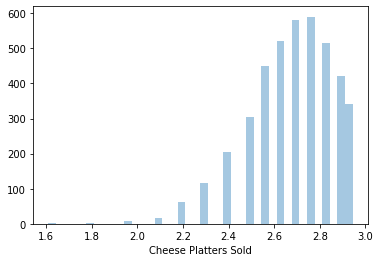

In [243]:
sns.distplot(np.log(df5['Cheese Platters Sold']), kde=False)

In [244]:
skew(df5['Cheese Platters Sold'])

-0.38587884124418304

In [245]:
skew(np.log(df5['Cheese Platters Sold']))

-0.8851493710207807

In [246]:
skew(np.sqrt(df5['Cheese Platters Sold']))

-0.6129955952351255

#### Normalize the graph

In [247]:
m=max(df5['Cheese Platters Sold'])
reflected_val=1+m-df5['Cheese Platters Sold']

In [248]:
skew(reflected_val)

0.38587884124418304

In [249]:
skew(np.log(reflected_val))

-0.8293116307612521

In [250]:
skew(np.sqrt(reflected_val))

-0.19661147603209594

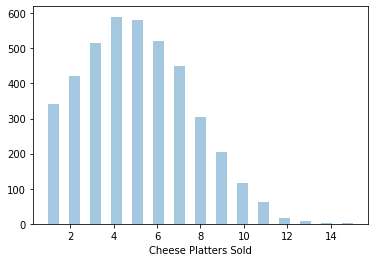

In [251]:
sns.distplot(reflected_val, kde=False)

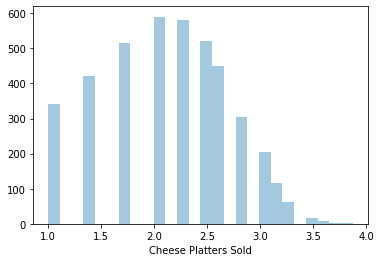

In [252]:
sns.distplot(np.sqrt(reflected_val), kde=False)

In [253]:
df5.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold,Week Part,Hour Class,Almost Stock Out
0,8,1,2,144,0,18,Weekday,midday,0
1,5,3,1,152,0,15,Weekday,early,0
2,4,2,4,150,0,16,Weekday,early,0
3,6,2,4,131,0,13,Weekday,early,0
4,5,6,4,164,0,18,Weekday,early,0


target: 'Cheese Platters Sold'
categoric features:  'Week Part','Hour Class '
numeric fetaures: 'Length of Flight (Hrs)','Passengers Boarded'
    
??? :'Stock Out Occurred'
not used: 'Dptr Hour',  'Day of Week',

In [255]:
df5=df5[['Week Part','Hour Class','Length of Flight (Hrs)',
       'Passengers Boarded', 'Cheese Platters Sold']] #
df5=pd.get_dummies(df5)
df5.head()

,Length of Flight (Hrs),Passengers Boarded,Cheese Platters Sold,Week Part_Weekday,Week Part_Weekend,Hour Class_early,Hour Class_midday,Hour Class_night
0,1,144,18,1,0,0,1,0
1,3,152,15,1,0,1,0,0
2,2,150,16,1,0,1,0,0
3,2,131,13,1,0,1,0,0
4,6,164,18,1,0,1,0,0


In [256]:
features=['Length of Flight (Hrs)','Passengers Boarded','Week Part_Weekday','Hour Class_night','Hour Class_midday']#,'Week Part_Weekend','Hour Class_early'
X=df5[features]
y=df5['Cheese Platters Sold']
# y=np.sqrt(df5['Cheese Platters Sold'])

In [257]:
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

model=sm.OLS(y_train,X_train)
result=model.fit()
print(result.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Cheese Platters Sold   R-squared (uncentered):                   0.997
Model:                              OLS   Adj. R-squared (uncentered):              0.997
Method:                   Least Squares   F-statistic:                          2.253e+05
Date:                  Fri, 20 Mar 2020   Prob (F-statistic):                        0.00
Time:                          19:59:23   Log-Likelihood:                         -3692.3
No. Observations:                  3102   AIC:                                      7395.
Df Residuals:                      3097   BIC:                                      7425.
Df Model:                             5                                                  
Covariance Type:              nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
---------

In [258]:
features=['Length of Flight (Hrs)','Passengers Boarded','Week Part_Weekday','Hour Class_midday']#,'Week Part_Weekend','Hour Class_early','Hour Class_night'
X=df5[features]
y=df5['Cheese Platters Sold']

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

model=sm.OLS(y_train,X_train)
result=model.fit()
print(result.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Cheese Platters Sold   R-squared (uncentered):                   0.997
Model:                              OLS   Adj. R-squared (uncentered):              0.997
Method:                   Least Squares   F-statistic:                          2.816e+05
Date:                  Fri, 20 Mar 2020   Prob (F-statistic):                        0.00
Time:                          19:59:28   Log-Likelihood:                         -3692.6
No. Observations:                  3102   AIC:                                      7393.
Df Residuals:                      3098   BIC:                                      7417.
Df Model:                             4                                                  
Covariance Type:              nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
---------

In [259]:
model=sm.OLS(y_test,X_test)
result2=model.fit()
# print(result2.summary())

In [260]:
print('train score: ',r2_score(y_train, result.predict()).round(4))
print('test score: ',r2_score(y_test, result2.predict()).round(4))

train score:  0.9038
test score:  0.8971


#### linear regresssion library

In [261]:
linModel=LinearRegression(fit_intercept=True)

print (f'train score: {process_train(linModel,X_train).round(4)}')
print (f'test score: {process_test(linModel,X_test)}')

train score: 0.9197
test score: 0.9135


In [262]:
x=pd.DataFrame(linModel.coef_.round(2), index=X_train.columns)
x=x.rename(columns={0:'coefficient'})
x

,coefficient
Length of Flight (Hrs),0.41
Passengers Boarded,2.27
Week Part_Weekday,0.58
Hour Class_midday,1.80


In [263]:
ss=StandardScaler()
X_test_sc=ss.fit_transform(X_test)

x=pd.DataFrame(columns=[linModel.predict(X_test_sc).round(), y_test]).T
# x.rename(columns={'':'predict','Cheese Platters Sold':'y_test'}, inplace=True)
x

,
,Cheese Platters Sold
13.0,13
14.0,14
17.0,16
14.0,14
15.0,17
...,...
16.0,17
12.0,12
16.0,16


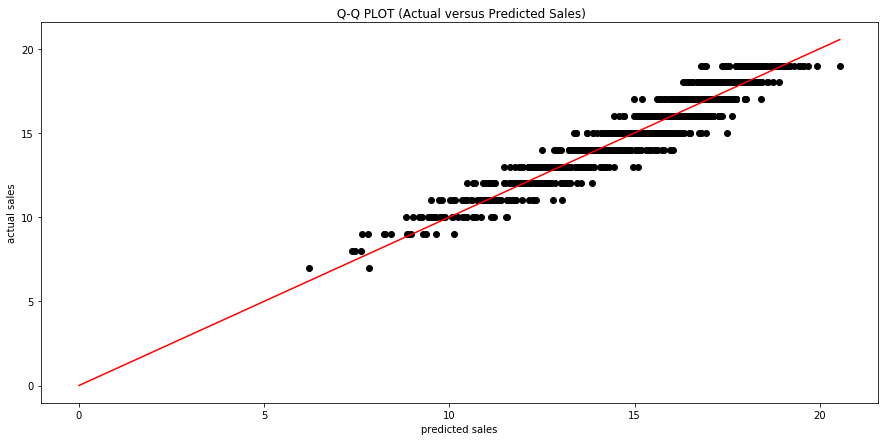

In [264]:
plt.figure(figsize=(15,7))

plt.scatter(linModel.predict(X_test_sc),y_test, c='k')
plt.xlabel('predicted sales')
plt.ylabel('actual sales')
plt.title(' Q-Q PLOT (Actual versus Predicted Sales)')

plt.plot( [0, np.max(linModel.predict(X_test_sc))], [0, np.max(linModel.predict(X_test_sc))], c = 'r')

### Model 2B- Poisson Regression 

In [265]:
df6=df2[df2['Stock Out Occurred']==0]
df6.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold,Week Part,Hour Class,Almost Stock Out
0,8,1,2,144,0,18,Weekday,midday,0
1,5,3,1,152,0,15,Weekday,early,0
2,4,2,4,150,0,16,Weekday,early,0
3,6,2,4,131,0,13,Weekday,early,0
4,5,6,4,164,0,18,Weekday,early,0


In [266]:
df6=df6[['Week Part','Hour Class','Length of Flight (Hrs)',
       'Passengers Boarded', 'Cheese Platters Sold']] #
df6=pd.get_dummies(df6)
df6.head()

,Length of Flight (Hrs),Passengers Boarded,Cheese Platters Sold,Week Part_Weekday,Week Part_Weekend,Hour Class_early,Hour Class_midday,Hour Class_night
0,1,144,18,1,0,0,1,0
1,3,152,15,1,0,1,0,0
2,2,150,16,1,0,1,0,0
3,2,131,13,1,0,1,0,0
4,6,164,18,1,0,1,0,0


In [267]:
features=['Length of Flight (Hrs)','Passengers Boarded','Week Part_Weekday','Hour Class_night','Hour Class_midday']#,'Week Part_Weekend','Hour Class_early'
X=df6[features]
y=df6['Cheese Platters Sold']

In [268]:
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

In [269]:
#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit() #Poisson

#Print the training summary.
print(poisson_training_results.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Cheese Platters Sold   No. Observations:                 3102
Model:                              GLM   Df Residuals:                     3097
Model Family:                   Poisson   Df Model:                            4
Link Function:                      log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -7770.6
Date:                  Fri, 20 Mar 2020   Deviance:                       1459.1
Time:                          20:00:09   Pearson chi2:                 1.54e+03
No. Iterations:                       4                                         
Covariance Type:              nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Length o

In [270]:
poisson_train_predictions = poisson_training_results.get_prediction(X_train)
predictions_summary_frame = poisson_train_predictions.summary_frame()
y_train_pred_poisson=predictions_summary_frame['mean']

#Make some predictions on the test data set.
poisson_test_predictions = poisson_training_results.get_prediction(X_test)
predictions_summary_frame2 = poisson_test_predictions.summary_frame()
y_test_pred_poisson=predictions_summary_frame2['mean']
# print(predictions_summary_frame)

In [271]:
print(f'train score: {r2_score(y_train,y_train_pred_poisson).round(4)}')
print(f'test score: {r2_score(y_test,y_test_pred_poisson).round(4)}')

train score: 0.0418
test score: 0.038


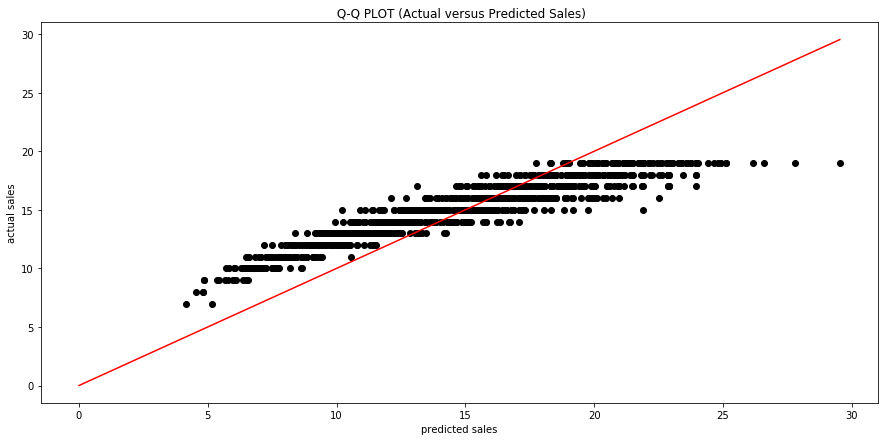

In [272]:
plt.figure(figsize=(15,7))

predicted_sales=predictions_summary_frame2['mean']

plt.scatter(predicted_sales,y_test, c='k')
plt.xlabel('predicted sales')
plt.ylabel('actual sales')
plt.title(' Q-Q PLOT (Actual versus Predicted Sales)')

plt.plot( [0, np.max(predicted_sales)], [0, np.max(predicted_sales)], c = 'r')

#### linear regresssion library